# K-Nearest Neighbors (KNN)

KNN is an example of memory based learning (or instance based learning). Instead of training a classifier you simply memorize all of the data and find the K closest examples to the training data. You need some kind of distance metric (this is a hyperparameter). You choose the distance metric based on your application, by default people use Euclidean distance. 

$$p(y=c \mid x, \mathcal{D}, K) = \frac{1}{K} \sum_{i \in N_K(x,\mathcal{D})} \mathbb{I}(y_i=c)$$

where $N_K(x,\mathcal{D})$ are the indices of the K nearest points to N in $\mathcal{D}$ (e.g. $i=\{44, 61, 2\}$), and $\mathbb{I}(e)$ is the indicator function defined as 

$$
  \mathbb{I}(e) =
  \begin{cases}
   1 & \text{if $e$ is true} \\
   0 & \text{if $e$ is false} 
  \end{cases}
$$

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(42)

% matplotlib inline

shape of dataset: (1000, 2)


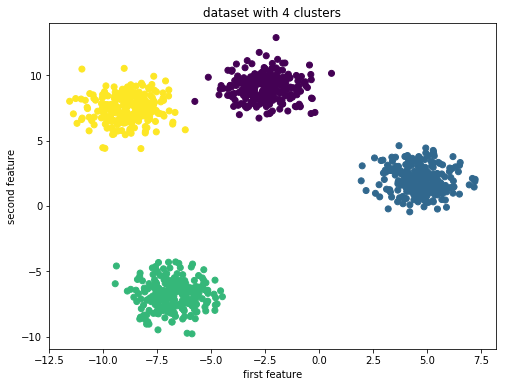

In [121]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("dataset with 4 clusters")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
class KNN():
    def __init__(self, distance_metric='euclidean'):
        assert distance_metric in ['euclidean']
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        self.data = X
        self.labels = y
    
    def closest_k_distances(self, X, k):
        # make all arrays n_examples x n_dimensions (i.e. 2d arrays)
        if X.ndim == 1:
            X = np.expand_dims(X, axis=0)
            
        n_samples, n_dimensions = X.shape
    
        if self.distance_metric == 'euclidean':
            distances = [np.sqrt(np.sum(np.square(self.data - X[i]), axis=1)) for i in range(n_samples)]
            
        # find the k closest points    
        N_k_list = np.argsort(distances)[:, :k]
        return N_k_list
        
    def predict(self, X, k=1):
        # find the indices of the k-nearest points N_k
        N_k_list = self.closest_k_distances(X, k)
        
        p_list = []
        for N_k in N_k_list:
            # calculate the predictive distribution over the labels
            p = {}
            count = 0
            for c in set(self.labels):
                p_c = np.sum([self.labels[i] == c for i in N_k]) / float(k)
                p[str(c)] = p_c
            p_list.append(p)
            
        return p_list

In [123]:
clf = KNN()

In [124]:
clf.fit(X_train, y_train)

In [146]:
predictions = clf.predict(X_test, 100)

accuracy = []
for prediction,label in zip(predictions, y_test):
    key_max = max(prediction.keys(), key=(lambda k: prediction[k]))
    accuracy.append(int(key_max) == label)
    
accuracy = np.sum(accuracy) / float(len(accuracy))
print('test accuracy = {}'.format(accuracy))

test accuracy = 1.0


In [139]:
predictions

[{'0': 1.0, '1': 0.0, '2': 0.0, '3': 0.0},
 {'0': 1.0, '1': 0.0, '2': 0.0, '3': 0.0},
 {'0': 1.0, '1': 0.0, '2': 0.0, '3': 0.0},
 {'0': 1.0, '1': 0.0, '2': 0.0, '3': 0.0},
 {'0': 0.0, '1': 0.0, '2': 0.0, '3': 1.0}]

In [140]:
y_test[:5]

array([0, 0, 0, 0, 3])

In [141]:
accuracy

[True, True, True, True, False]